In [72]:
#Importing libraris
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6
from statsmodels.tsa.arima_model import ARIMA
from numpy import log
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [76]:
data = pd.read_csv(r'C:\Users\Pratik G Ratnaparkhi\Desktop\IVY Python\03Case2\superstore.csv')

In [77]:
#Lets do some discripitive analysis
data.head()

,Order Date,Sales
0,1/6/2014,907.152
1,1/6/2014,911.424
2,1/9/2014,213.480
3,1/13/2014,90.570
4,1/15/2014,1097.544


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  1847 non-null   object 
 1   Sales       1847 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.0+ KB


In [79]:
#Lets do Time series Analysis 
data1 = data.rename(columns={'Order Date': 'Date'})
data1

,Date,Sales
0,1/6/2014,907.152
1,1/6/2014,911.424
2,1/9/2014,213.480
3,1/13/2014,90.570
4,1/15/2014,1097.544
...,...,...
1842,12/25/2017,97.980
1843,12/27/2017,36.240
1844,12/28/2017,79.990
1845,12/29/2017,206.100


In [80]:
#Changing dtype of date
data1['Date'] = pd.to_datetime(data1['Date'],infer_datetime_format=True)


In [81]:
data1.head()

,Date,Sales
0,2014-01-06,907.152
1,2014-01-06,911.424
2,2014-01-09,213.480
3,2014-01-13,90.570
4,2014-01-15,1097.544


In [82]:
data2 = data1.set_index(['Date'])
data2.head()

,Sales
Date,
2014-01-06,907.152
2014-01-06,911.424
2014-01-09,213.480
2014-01-13,90.570
2014-01-15,1097.544


In [83]:
#As ARIMA model is best with long term Analysis 
#We will Convert the date into monthly basis
data3 = data2.resample('MS').mean()
data3.head(12)

,Sales
Date,
2014-01-01,425.498444
2014-02-01,181.656000
2014-03-01,581.253545
2014-04-01,801.411077
2014-05-01,368.617148
2014-06-01,466.887714
2014-07-01,539.372714
2014-08-01,340.807444
2014-09-01,543.836870


In [84]:
print(data3.info())

print(data3.describe())

print(data3.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes
None
             Sales
count    48.000000
mean    493.260143
std     287.975592
min     181.656000
25%     353.845096
50%     402.372492
75%     500.589349
max    1720.650000
(48, 1)


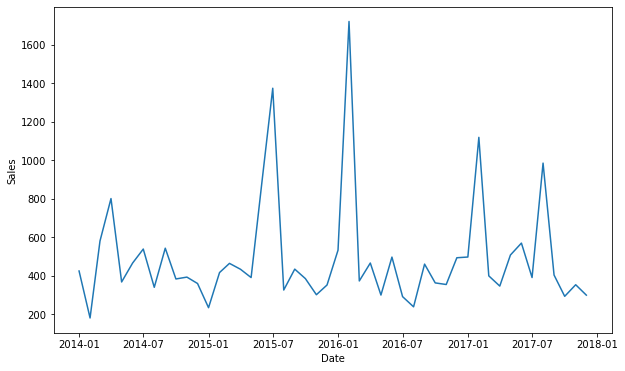

In [85]:
#Lets Explore the Dataset
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(data3)

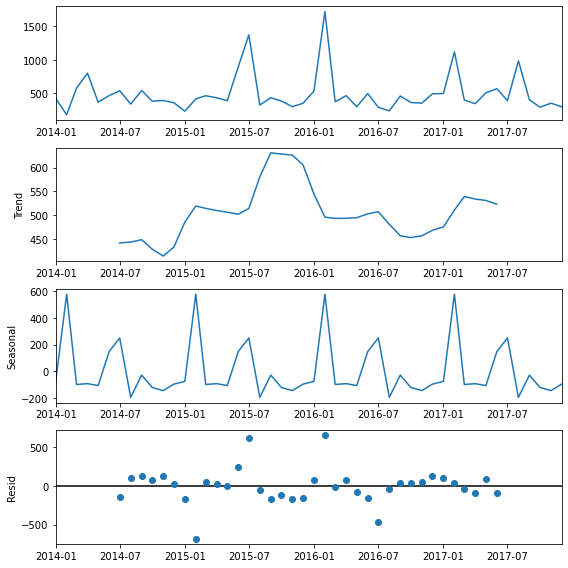

In [86]:
#Lets decompose the Data:-Trend , Seasonal,and Irregular Component
rcParams['figure.figsize']=8,8
decomposition = sm.tsa.seasonal_decompose(data3,model='additive')
fig = decomposition.plot()
plt.show()

In [87]:
#plotting the data
def test_stationarity(sales_data):
    roll_mean = sales_data.rolling(window=12).mean()
    roll_stdv = sales_data.rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    sales = plt.plot(sales_data,color='orange',label='Sale')
    mean = plt.plot(roll_mean , color = 'blue' , label='mean')
    std = plt.plot(roll_stdv, color = 'black' , label='stdv')
    plt.legend(loc='upper left')
    plt.title('Rolling Mean And Std Deviation')
    plt.show(block=False)

    test = adfuller(sales_data['Sales'],autolag='AIC')
    testop = pd.Series(test[0:4],index=['Test Statistics','p Value','Lags','Observations'])
    for key , value in test[4].items():
        testop['critical value (%s)'%key] = value
    print(testop)


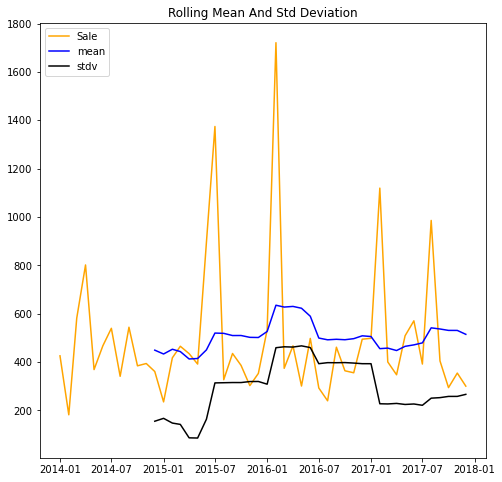

Test Statistics        -6.351736e+00
p Value                 2.600814e-08
Lags                    0.000000e+00
Observations            4.700000e+01
critical value (1%)    -3.577848e+00
critical value (5%)    -2.925338e+00
critical value (10%)   -2.600774e+00
dtype: float64


In [88]:
test_stationarity(data3)

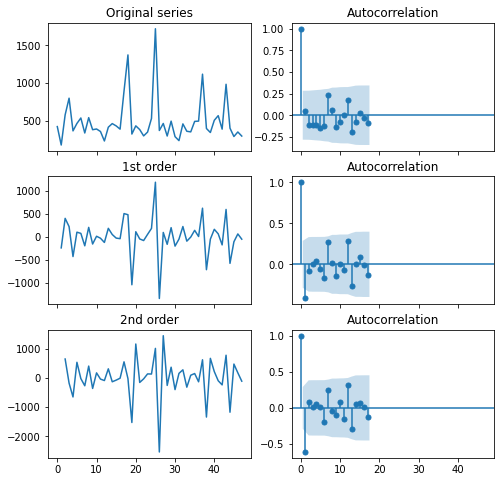

In [89]:
#lets check the sationarity by diffrencing
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

data4 = data3.reset_index()

fig, axes = plt.subplots(3,2,sharex=True)
axes[0,0].plot(data4.Sales);axes[0,0].set_title('Original series')
plot_acf(data4.Sales,ax=axes[0,1])

axes[1,0].plot(data4.Sales.diff());axes[1,0].set_title('1st order')
plot_acf(data4.Sales.diff().dropna(),ax=axes[1,1])

axes[2,0].plot(data4.Sales.diff().diff());axes[2,0].set_title('2nd order')
plot_acf(data4.Sales.diff().diff().dropna(),ax=axes[2,1])

plt.show()

In [90]:
#At first order diffrencing we are getting stationarity

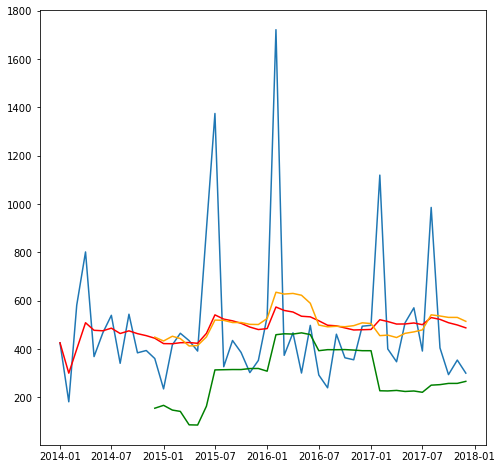

In [91]:
#Calculating the weighted Avg to know the trend which is present
#in time series
roll_mean1 = data3.rolling(window=12).mean()
roll_stdv1 = data3.rolling(window=12).std()
Avg = data3.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(data3)
plt.plot(Avg,color='red')
plt.plot(roll_mean1,'orange')
plt.plot(roll_stdv1,color='green')


C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


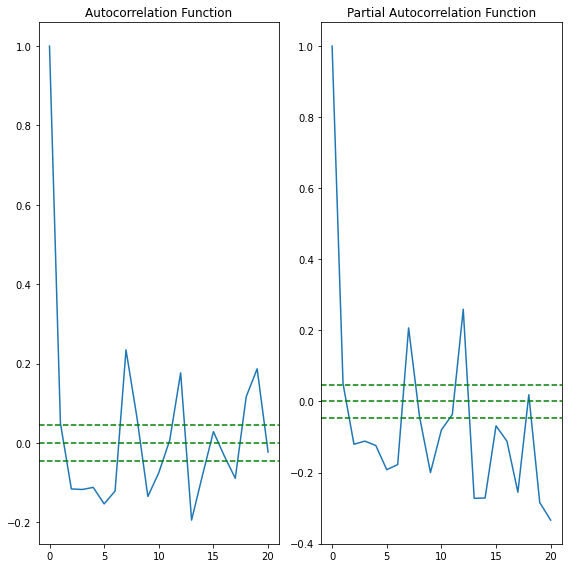

In [92]:
#getting p and q values by ACF and PACF method
from statsmodels.tsa.stattools import acf,pacf
acf1 = acf(data3,nlags=20)
pacf1 = pacf(data3,nlags=20,method='ols')

plt.subplot(121)
plt.plot(acf1)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data2)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data2)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(pacf1)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data2)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data2)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [135]:
# As our ARIMA model failed we will go ahead with SARIMA model

In [122]:
model = sm.tsa.statespace.SARIMAX(data3['Sales'],order=(1,0,1),seasonal_order=(1,0,1,12))
result1 = model.fit()

C:\Users\Pratik G Ratnaparkhi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<AxesSubplot:xlabel='Date'>

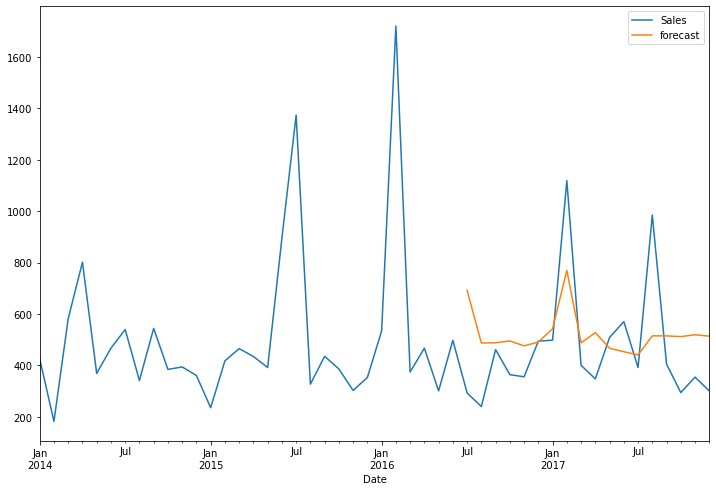

In [131]:
data3['forecast'] = result1.predict(start=30,end=48,dynamic=True)
data3[['Sales','forecast']].plot(figsize=(12,8))

In [125]:
from pandas.tseries.offsets import DateOffset
dates = [data3.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [126]:
datesdf = pd.DataFrame(index=dates[1:],columns=data3.columns)

In [137]:
datesdff = pd.concat([data3,datesdf])

<AxesSubplot:>

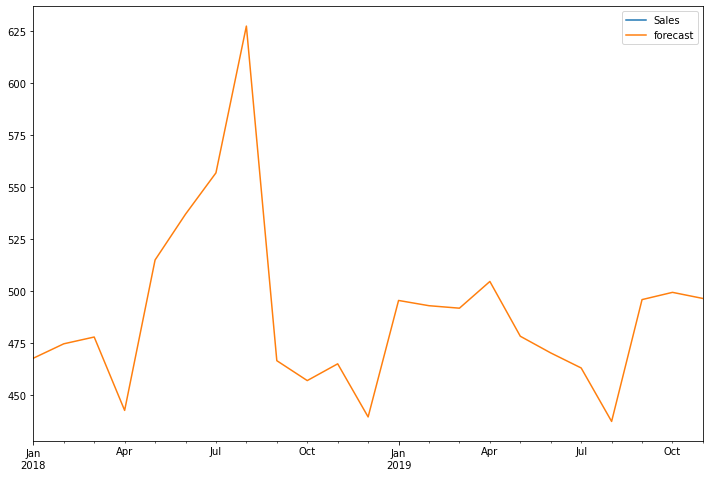

In [138]:
datesdf['forecast'] = result1.predict(start=48,end=70,dynamic=True)
datesdf[['Sales','forecast']].plot(figsize=(12,8))